# Задание 1. Интерполяция полиномом Лагранжа

## Задание:

#### 1. Написать программу, исходные данные: 
Дан отрезок [a, b] - вводим с клавиатеры, и функция, по которой будем считать значения в узлах. Используем многочлен второй степени (3 узла), и они равноотстощие на отрезке [a, b]. С помощью двойного цикла запрограммировать вычисление многочлена Лагранжа в произволной точке x. --- См. interpolate1.

#### 2. Функция f задана таблицей значений. 
Найти с помощью многочлена Лагранжа L2(x) приближенное значение функции в точках x = 1.5 и x = 2.5. --- См. interpolate2.

#### 3. Построить графики функции f(x) и полинома Лагранжа

### Импорт и вспомогатльные функции для интерполяции многочленом Лагранжа:

In [26]:
import numpy as np

In [27]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [28]:
def f(x):
    y = x*x - 3
    return y


In [29]:
def delta(y1, y2):
    return abs(y1 - y2)


In [59]:
# Основная функция интерполяции:
def interpolate2(X, Y, xx):
    sum = 0.0 # Сумма-накопитель
    for i in range(0, len(X)):
        pp = Y[i]
        for j in range(0, len(X)):
            if i != j:
                pp *= (xx - X[j])/(X[i] - X[j])
        sum += pp
    return sum


In [60]:
# Вспомогательная функция интерполяции:
def interpolate1(a, b, size, xx):
    # Передаем в функцию границы отрезка a и b, число разбиений (узлов) этого отрезка size
    # и значение xx, для которого ищем y, а также функция f, для которой это все ищется
    X = [] # Формируем пустой вектор X (список)
    Y = [] # Формируем пустой вектор Y (список)
    delta = abs(a - b) / (size - 1) # Находим интервал разбиения
    X.append(a) # Начало отрезка
    for i in range(1, size - 1):  # Заполняем вектор X
        X.append(X[i-1] + delta)
    X.append(b) # Конец отрезка
    for i in range(0, size):  # Заполняем вектор Y
        Y.append(f(X[i]))
    # И вызываем основную функцию:
    return interpolate2(X, Y, xx)
    

### Основная программа

In [61]:
# Часть первая: известен интервал и функция, выполняем разбиение для многочлена степени n (на n+1 узлов):
n = 2 # Многочлен степени 2 = число узлов 3
a = 1.0 # Начало
b = 3.0 # и конец интервала
xx = 2.5 # Точка внутри интервала, для которой выполняется интерполяция
# а f - функция исходная, нам она нужна чтобы посчитать в узлах значения f(x)

# Выполняем интерполяцию через вспомогательную функцию:
yy = interpolate1(a, b, n+1, xx)
# А также вычисляем истинное значение функции в этой точке:
y = f(xx)

# Выводим результат:
print("L" + str(n) + "(" + str(xx) + ") = " + str(yy))
print("f" + "(" + str(xx) + ") = " + str(y))

L2(2.5) = 3.25
f(2.5) = 3.25


In [64]:
# Часть вторая: известны узловые точки и функция, выполняем интерполяцию для xx:
myX = [] # Создаем пустой вектор X
myX.append(1.0) # добавляем в конец вектора
myX.append(2.0)
myX.append(3.0)

myY = [] # Создаем пустой вектор Y
myY.append(-2.0) # добавляем в конец вектора
myY.append(1.0)
myY.append(6.0)

xx1 = 2.5 # Точка внутри интервала, для которой выполняется интерполяция

# Выполняем интерполяцию через основную функцию:
yy1 = interpolate2(myX, myY, xx1)
# А также вычисляем истинное значение функции в этой точке:
y1 = f(xx1)

# Выводим результат:
print("L" + str(len(myX)-1) + "(" + str(xx1) + ") = " + str(yy1))
print("f" + "(" + str(xx1) + ") = " + str(y1))

L2(2.5) = 3.25
f(2.5) = 3.25


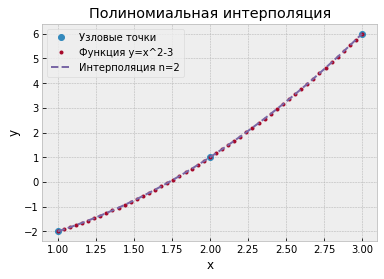

In [78]:
# Часть третья: строим графики по точкам

# Пусть известен интервал и функция, выполняем разбиение для многочлена степени n (на n+1 узлов):
n = 2 # Многочлен степени 2 = число узлов 3
a = 1.0 # Начало
b = 3.0 # и конец интервала

# Выводим результат:

# сначала узловые точки:
s1 = 'Узловые точки'
sg = 'o'
xx = np.linspace(a, b, n+1) # Набор точек внутри интервала, для которых выполняется интерполяция
# Выполняем интерполяцию через вспомогательную функцию:
yy = interpolate1(a, b, n+1, xx)
plt.plot(xx, yy, sg, label=s1)

# Затем исходную функцию:
s1 = 'Функция ' + 'y=x^2-3'
sg = '.'
n1 = 50
x1 = np.linspace(a, b, n1+1)
y1 = f(x1)
plt.plot(x1, y1, sg, label=s1)

# Затем интерполяцию:
s2 = 'Интерполяция n=' + str(n)
sg2 = '--'
n2 = 50
x2 = np.linspace(a, b, n2+1)
y2 = interpolate1(a, b, n2+1, x2)
plt.plot(x2, y2, sg2, label=s2)

# И подписываем оси и легенду
plt.title('Полиномиальная интерполяция');
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend(loc=0)
plt.show()